# Build the model

In [101]:
import numpy as np


class LogisticRegression:
    def __init__(self,lr = 0.01 , n_etrs = 1000):
        self.lr = lr
        self.n_etrs = n_etrs

    
    def fit(self,X,y):
        
        # Initialize weights and bias
        n_samples , n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent

        for _ in range(self.n_etrs) :

            z = np.dot(X,self.weights) + self.bias
            y_pred = 1/(1+np.exp(-z))

            dw=1/n_samples*np.dot(X.T,(y_pred-y))
            db=1/n_samples*np.sum(y_pred-y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def parameters(self,X,y):
        self.fit(X,y)
        return self.weights , self.bias

    def predict(self, X):
        z = np.dot(X,self.weights) + self.bias
        y_pred = 1/(1+np.exp(-z))
        return np.round(y_pred).astype(int) # to get intgers not floats classes 
    
    def score(self,X,y):
        y_pred = self.predict(X)
        acc = np.sum(y_pred == y) / len(y)
        return acc
    


# Train and test the model

### 2) import dataset

In [102]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X , y = make_classification(n_samples=1000,n_features=5 ,n_classes=2)

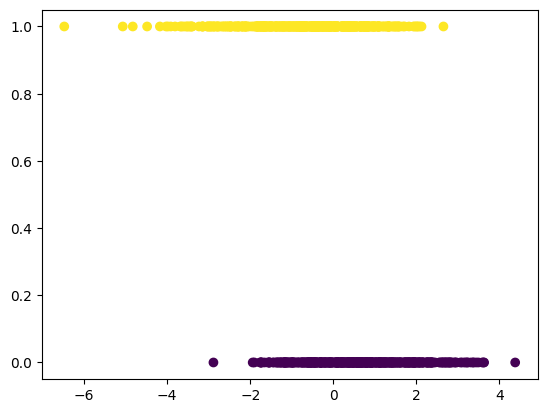

In [103]:
plt.scatter(X[:,0],y ,c = y)

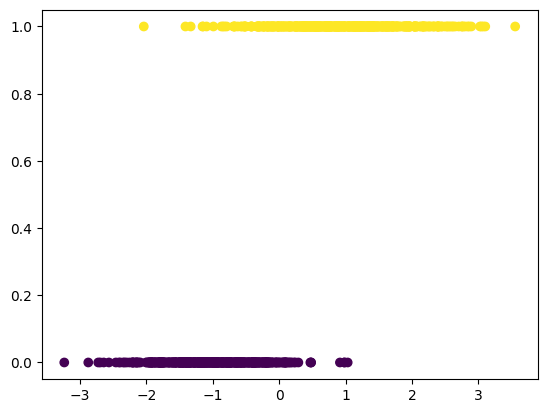

In [104]:
plt.scatter(X[:,1],y ,c = y)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2) Train and test the model

In [106]:
model = LogisticRegression(lr = 0.01,n_etrs=2000)

model.fit(X_train , y_train)

model.score(X_test,y_test)

0.935

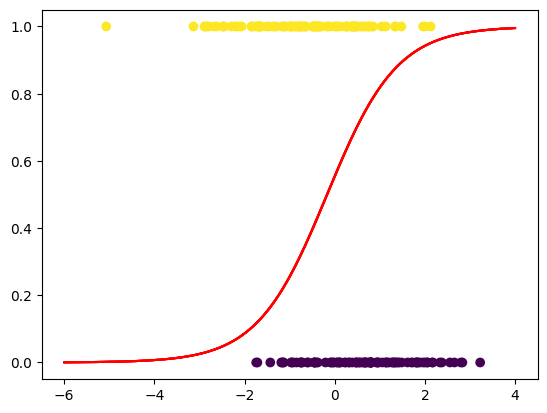

In [120]:
weights , bias = model.parameters(X_train,y_train)

X_plot = np.linspace(-6,4,5000).reshape(1000,5)
z = np.dot(X_plot,weights) + bias
y_pred = 1/(1+np.exp(-z))

plt.scatter(X_test[:,0] , y_test,c=y_test)
plt.plot(X_plot, y_pred,c='r')